# The Adult Income dataset

### Description

Title of dataset: adult.csv

Sources:

    * Original owners of database - US Census Bureau
    * Donor of database - Ronny Kohavi and Barry Becker
    * Date received - 05/19/96 
    
Number of Instances

    * 48842 instances, mix of continuous and discrete (train=32561, test=16281)
    * 45222 if instances with unknown values are removed (train=30162, test=15060)
    * Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

Number of Attributes/Fearures/Columns

    * 6 continuous, 8 nominal attributes. 

Attribute Information/Fearures/Columns

    * age: continuous.
    * workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    * fnlwgt: continuous.
    * education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    * education-num: continuous.
    * marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    * occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    * relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    * race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    * sex: Female, Male.
    * capital-gain: continuous.
    * capital-loss: continuous.
    * hours-per-week: continuous.
    * native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
    * income: >50K, <=50K 
    
Missing Values:
     
     7% rows have missing values. 
     


# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adult=pd.read_csv('adult.csv')

In [3]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
print(adult.shape)
print('No. of rows : ',adult.shape[0])
print('No. of columns : ',adult.shape[1])

(48842, 15)
No. of rows :  48842
No. of columns :  15


In [5]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Handle Missing Value

In [7]:
missing_val={'n/a','-','?'}
adult=pd.read_csv('adult.csv',na_values=missing_val)
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
adult.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
#remove rows where missing value is present
adult=adult.dropna(axis=0,how='any')

In [11]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [12]:
#remove fnlwgt column to adult dataset
adult=adult.drop('fnlwgt',axis=1)

In [13]:
#remove fnlwgt column to adult dataset
adult=adult.drop('educational-num',axis=1)

In [14]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   marital-status  45222 non-null  object
 4   occupation      45222 non-null  object
 5   relationship    45222 non-null  object
 6   race            45222 non-null  object
 7   gender          45222 non-null  object
 8   capital-gain    45222 non-null  int64 
 9   capital-loss    45222 non-null  int64 
 10  hours-per-week  45222 non-null  int64 
 11  native-country  45222 non-null  object
 12  income          45222 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


In [15]:
adult['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

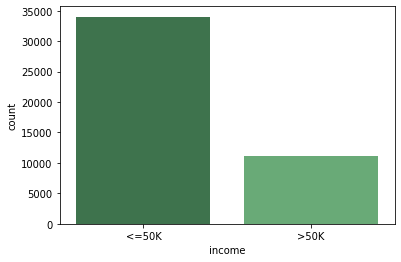

In [16]:
sns.countplot(x='income', data=adult, palette='Greens_d')

# Data Preparation

In [17]:
adt_categorical = adult.select_dtypes(include=['object'])

adt_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [18]:
adt_numerical = adult.select_dtypes(include=['int64'])

adt_numerical.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
5,34,0,0,30


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
adt_num = pd.DataFrame(scaler.fit_transform(adt_numerical), 
                      columns = adt_numerical.columns)
adt_num.head()

,age,capital-gain,capital-loss,hours-per-week
0,-1.024983,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.146733,-0.21878,0.754701
2,-0.798015,-0.146733,-0.21878,-0.078120
3,0.412481,0.877467,-0.21878,-0.078120
4,-0.344079,-0.146733,-0.21878,-0.910942


In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse=False)
adt_cat = pd.DataFrame(encoder.fit_transform(adt_categorical), 
                      columns=encoder.get_feature_names(adt_categorical.columns))
adt_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
adt = pd.concat([adt_num, adt_cat], axis=1)

adt.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
y = adt.pop('income_>50K')

x = adt

# Test Train Split

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

In [24]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(31655, 94) (31655,)
(13567, 94) (13567,)


# Training

In [25]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression()
Classifier.fit(x_train, y_train)

C:\Users\pooja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
#print coefficient and intercept
print(Classifier.coef_)
print(Classifier.intercept_)

[[ 0.3329597   2.43099797  0.27254898  0.36676253 -0.65888544 -0.53907042
  -0.40757773 -1.09858496 -0.81964495 -0.97361344 -0.14339424  0.38279946
  -0.58051571 -0.30046494 -0.77580795 -0.43723863  1.20227494  1.07355673
   1.71850784  2.45818142  0.55950681  2.0146439  -1.15983614  2.66149142
   0.93951541  1.10082205  2.02866599  0.25418145 -0.35119255 -0.0369574
   0.10255604  0.02364798  0.08330397  0.76281704 -0.99734082 -0.57647083
  -0.36169199 -0.8661253  -1.31668007  0.52529917  0.44216678  0.24471617
   0.5475161  -0.02483975  0.1713201  -0.73332734 -0.83785602  0.06448436
   1.10427169  0.94422625  0.34591217  0.21482347  0.54598048  0.70023944
   0.54748909 -0.33068202 -1.43172798  0.09031095 -0.34711291 -0.39224668
  -0.31301062  0.5872819   0.80541991  0.38806762 -0.01460594 -0.81008948
  -0.00459161 -0.01214631 -0.12841493 -0.19698914  0.0142785  -0.15476313
   0.07420071  1.00402325  0.41027719  0.49818244  0.17761569  0.0491086
  -0.46699639  0.0055023  -0.16595862 -0

# Prediction

In [27]:
y_pred = Classifier.predict(x_train)

In [28]:
y_test_pred = Classifier.predict(x_test)

In [29]:
Pred_prob = Classifier.predict_proba(x_test)

np.around(Pred_prob, decimals = 2)

array([[0.94, 0.06],
       [0.98, 0.02],
       [0.84, 0.16],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.56, 0.44]])

# Evalution

In [30]:
from sklearn import metrics
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error :  0.15906243089850372
Mean Squared Error :  0.15906243089850372
Root Mean Squared Error :  0.39882631670754093


In [31]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.8409375691014963

In [32]:
con_metric=metrics.confusion_matrix(y_test, y_test_pred)
con_metric

array([[9379,  763],
       [1395, 2030]], dtype=int64)

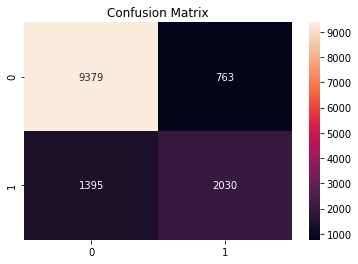

In [33]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [34]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90     10142
         1.0       0.73      0.59      0.65      3425

    accuracy                           0.84     13567
   macro avg       0.80      0.76      0.77     13567
weighted avg       0.83      0.84      0.84     13567

